# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [51]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# K mean 

C:\Users\sudhe\AppData\Local\Temp\ipykernel_10264\2334593462.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


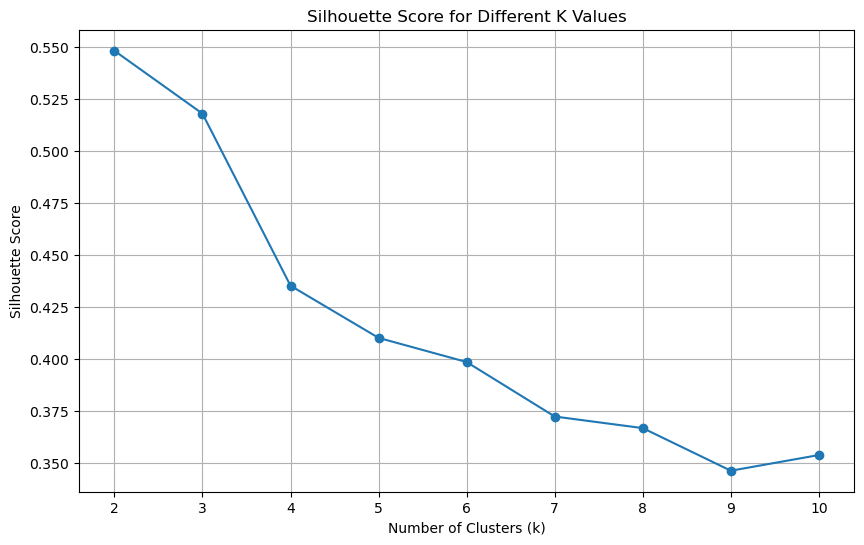

Optimal number of clusters: 2


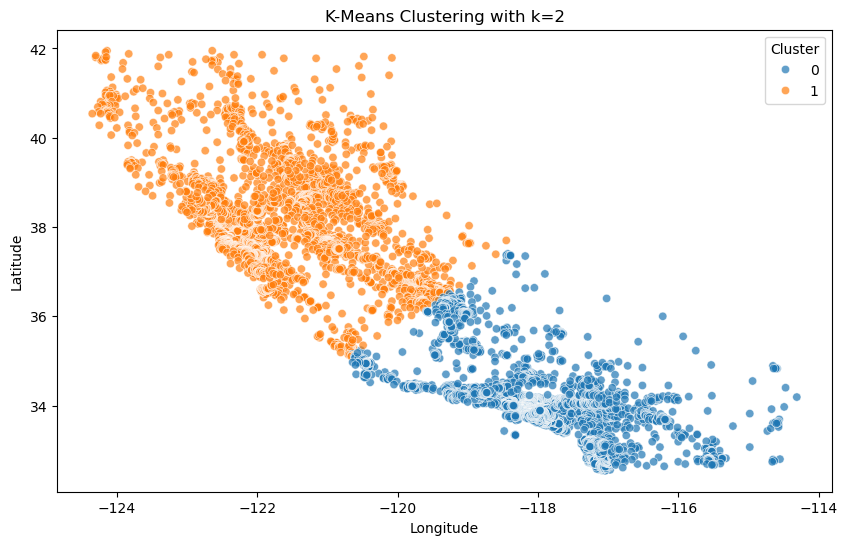

Cluster Analysis (Mean Median Income per Cluster):
         median_income
Cluster               
0             3.922444
1             3.799659

Cluster 0:
Mean Median Income: 3.92
Number of data points in this cluster: 11937
Cluster 0 Longitude Range: -120.64 - -114.31
Cluster 0 Latitude Range: 32.54 - 37.4

Cluster 1:
Mean Median Income: 3.80
Number of data points in this cluster: 8703
Cluster 1 Longitude Range: -124.35 - -118.45
Cluster 1 Latitude Range: 35.1 - 41.95


In [6]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Constants for downloading the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Fetch the dataset
fetch_housing_data()

# Load the data into a DataFrame
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
housing_data = pd.read_csv(csv_path)

# Selecting relevant columns for clustering: 'longitude', 'latitude', and 'median_income'
housing_data = housing_data[['longitude', 'latitude', 'median_income']]

# Step 1: Preprocessing - Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing_data)

# Step 2: Optimize the Number of Clusters Using Silhouette Score
silhouette_scores = []
k_values = range(2, 11)  # Testing k values from 2 to 10

# K-Means Clustering and Silhouette Score Calculation
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_housing_data)
    score = silhouette_score(scaled_housing_data, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 3: Choose the Optimal K (based on the highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Step 4: Apply K-Means with Optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
optimal_labels = kmeans_optimal.fit_predict(scaled_housing_data)

# Step 5: Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['longitude'], y=housing_data['latitude'], hue=optimal_labels, palette='tab10', alpha=0.7)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Step 6: Analyze the Clusters by Median Income
housing_data['Cluster'] = optimal_labels
cluster_means = housing_data.groupby('Cluster').mean()

# Print the cluster means for insight into housing segments
print("Cluster Analysis (Mean Median Income per Cluster):")
print(cluster_means[['median_income']])

# Step 7: Discuss Distribution of Data Points
for cluster in cluster_means.index:
    cluster_data_points = housing_data[housing_data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Mean Median Income: {cluster_means.loc[cluster, 'median_income']:.2f}")
    print(f"Number of data points in this cluster: {len(cluster_data_points)}")
    print(f"Cluster {cluster} Longitude Range: {cluster_data_points['longitude'].min()} - {cluster_data_points['longitude'].max()}")
    print(f"Cluster {cluster} Latitude Range: {cluster_data_points['latitude'].min()} - {cluster_data_points['latitude'].max()}")

# Optional: Save Clustering Results to CSV for further analysis
housing_data.to_csv('kmeans_clustering_results.csv', index=False)


C:\Users\sudhe\AppData\Local\Temp\ipykernel_10264\454010752.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


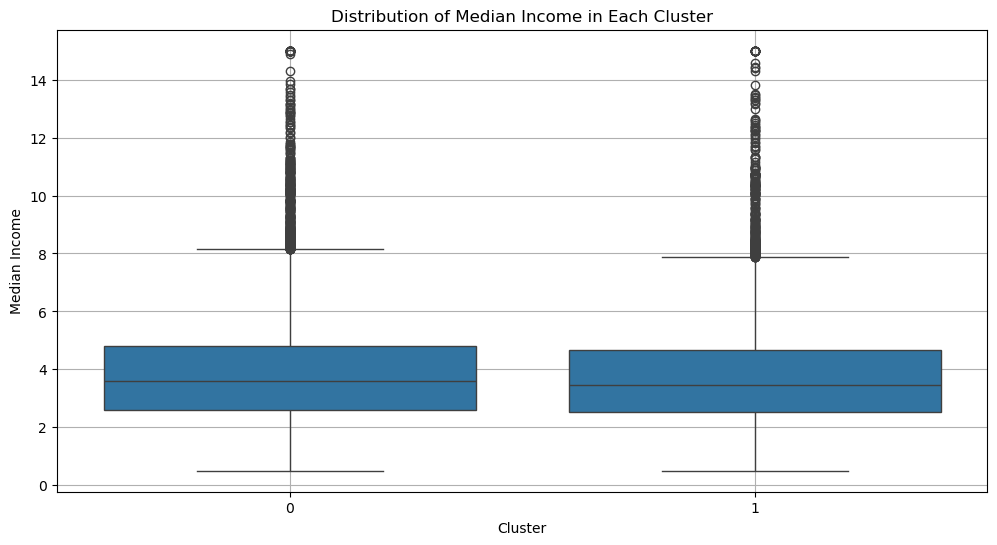

In [8]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Constants for downloading the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Fetch the dataset
fetch_housing_data()

# Load the data into a DataFrame
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
housing_data = pd.read_csv(csv_path)

# Selecting relevant columns for clustering: 'longitude', 'latitude', and 'median_income'
housing_data = housing_data[['longitude', 'latitude', 'median_income']]

# Step 1: Preprocessing - Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing_data)

# Step 2: Optimize the Number of Clusters Using Silhouette Score
silhouette_scores = []
k_values = range(2, 11)  # Testing k values from 2 to 10

# K-Means Clustering and Silhouette Score Calculation
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_housing_data)
    score = silhouette_score(scaled_housing_data, labels)
    silhouette_scores.append(score)

# Choose the Optimal K (based on the highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Apply K-Means with Optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
optimal_labels = kmeans_optimal.fit_predict(scaled_housing_data)

# Add cluster labels to the original DataFrame
housing_data['Cluster'] = optimal_labels

# Visualization: Boxplot for Median Income Distribution in Each Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='median_income', data=housing_data)
plt.title('Distribution of Median Income in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.xticks(rotation=0)
plt.grid()
plt.show()




C:\Users\sudhe\AppData\Local\Temp\ipykernel_10264\2729864456.py:22: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


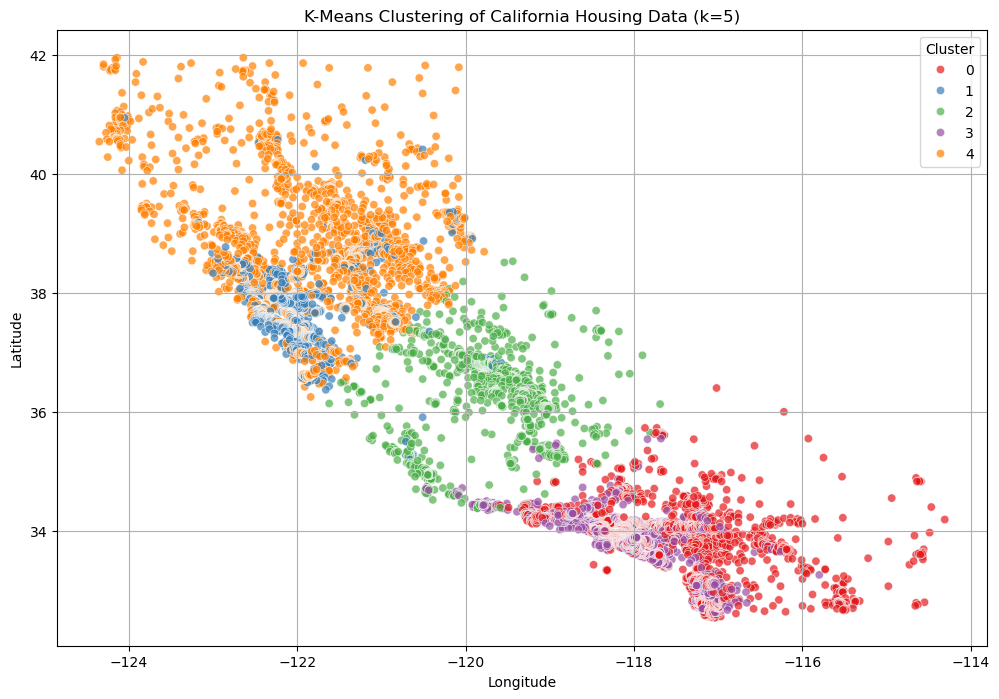

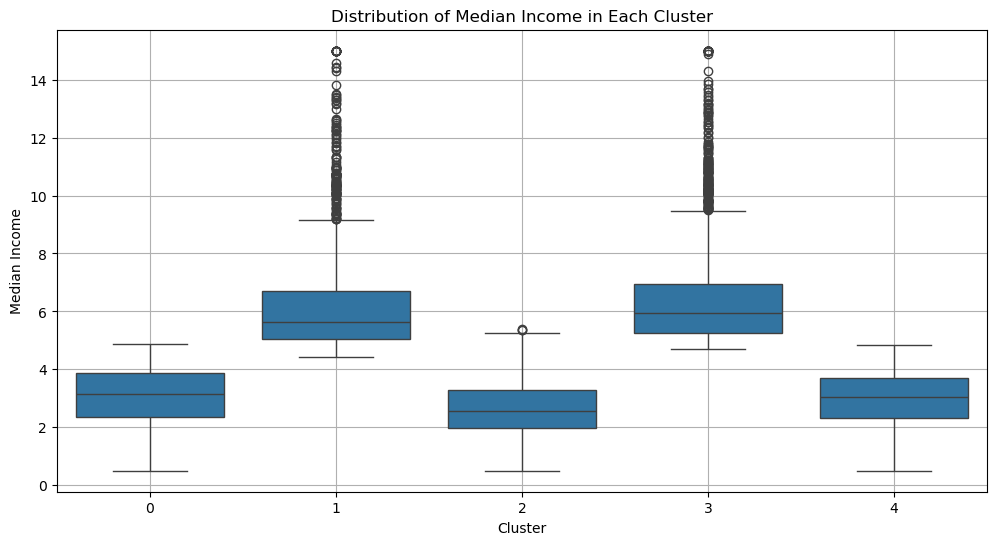

In [17]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Constants for downloading the dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Fetch the dataset
fetch_housing_data()

# Load the data into a DataFrame
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
housing_data = pd.read_csv(csv_path)

# Selecting relevant columns for clustering: 'longitude', 'latitude', and 'median_income'
housing_data = housing_data[['longitude', 'latitude', 'median_income']]

# Step 1: Preprocessing - Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing_data)

# Step 2: Apply K-Means with k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
housing_data['Cluster'] = kmeans.fit_predict(scaled_housing_data)

# Visualization: Scatter Plot for Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=housing_data, palette='Set1', alpha=0.7, edgecolor='w')
plt.title('K-Means Clustering of California Housing Data (k=5)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', loc='upper right')
plt.grid()
plt.show()

# Visualization: Boxplot for Median Income Distribution in Each Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='median_income', data=housing_data)
plt.title('Distribution of Median Income in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income')
plt.xticks(rotation=0)
plt.grid()
plt.show()


